Batch Gradient Descent

Strating for the first epoch, we will give values for w1,w2, and bias.

it will go through all the samples of the data, and at the end will calculate the total error = error1 + error2 + ..... error6

calculating w1, w2 and bias at the end, this will complete the 1st EPOCH.

and these values willl be taken fro nect epoch...


but, wait a minute....


what if I have 1000 samples and 2 features,.....will i go for 2000 calculations for epoch ???? 

or what if we have large number of features .... then weights adjustment will be hard,,,,,,

--------------------------------------------------------------------------------------------

another approach,


lets adjust the weights directly after going through over one sample rather than one complete epoch.

it's called stochastic gradient descent

------------------------------------------------------------------------------------------------------------------------------

mini batch gradient descent is like stochastic gradient descent, instead of chosing one sample, we use a batch of samples. then adjust the weights

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
df.sample(5)

,area,bedrooms,price
16,1180,3,48.0
9,3700,5,167.0
12,1000,2,38.0
17,1540,3,60.0
10,1800,3,82.0


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()

x_scaled = scaled.fit_transform(df.drop('price', axis=1))
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
y_scaled = scaled.fit_transform(df['price'].values.reshape(df.shape[0],1))
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

BATCH GRADIENT DESCENT

In [12]:
x_scaled.shape

(20, 2)

In [36]:
def batch_gradient_descent(x, y_true, epochs, learning_rate=0.01):

    number_of_features = x.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):

        y_predicted = np.dot(w, np.transpose(x_scaled)) + b

        w_grad = (-2/total_samples) * (np.dot(np.transpose(x), ( y_true - y_predicted)))
        b_grad = (-2/total_samples) * (np.sum( y_true - y_predicted))

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

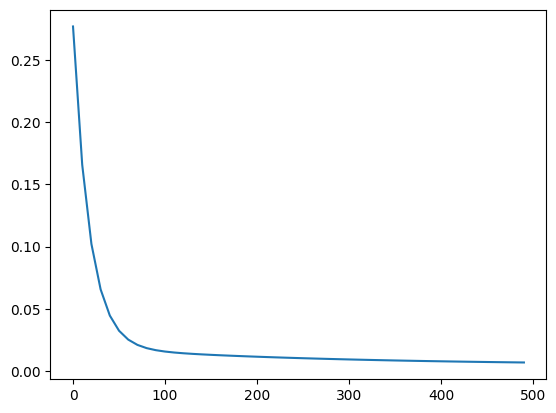

In [37]:
plt.plot(epoch_list, cost_list)

In [50]:
def predict(area, bedrooms, w, b):
    x_scaled = scaled.transform([[area, bedrooms]])[0]

    price_scaled  = w[0]*x_scaled[0] + w[1]*x_scaled[1] + b
    return scaled.inverse_transform([[price_scaled]])[0][0]

In [58]:
def stochastic_gradient_descent(x, y, epochs, learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epochs_list = []

    for i in range(epochs):
        import random
        random_index = random.randint(0, total_samples-1)
        sample_x = x[random_index]
        sample_y = y[random_index]
        y_predicted = np.dot(w, sample_x.T) + b


        w_grad = (-2/total_samples) * np.dot(sample_x.T, (sample_y - y_predicted))
        b_grad = (-2/total_samples) * (sample_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y - y_predicted)

        if i%100==0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w, b, cost, cost_list, epochs_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epochs_list_sgd = stochastic_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0]), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70877168, 0.67583329]), -0.23410500723491567, 0.009071868977547708)

In [59]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

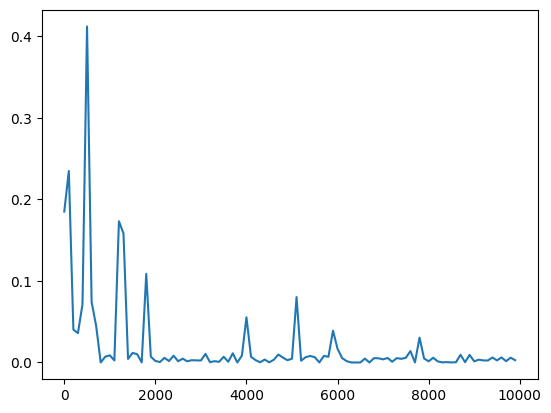

In [61]:
plt.plot(epochs_list_sgd, cost_list_sgd)